In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/'

osp = MAC

## 1. Load aligned peaksets

In [4]:
output_dir = osp+'/pymz/mzmine/peak_picked_files/samples_alignment/'

In [5]:
all_df = pd.read_csv(output_dir+'pp_aligned.csv', index_col=0)
feature_description = all_df.iloc[:,:2]
all_samples = all_df.iloc[:,2:-1]
all_samples.columns = [x.split(" ")[0] for x in list(all_samples.columns)]

## 2. Label samples

In [6]:
condition = []
dataset = []
for name in np.array(all_samples.columns):
    value = name.split('.')[0].split('_')[0][0]
    value2 = name.split('.')[0].split('_')[0][0]
    
    if (value == 'C' and len(name.split('.')[0].split('_')) == 2 and name.split('.')[0].split('_')[1] == '2'):
        condition.append('control')
        dataset.append('VL')
    elif  (value == 'C'):   
        condition.append('control')
        dataset.append('Zika')
    elif (value == 'Z'):
        condition.append('infected')
        dataset.append('Zika')
    elif (value[0] == 'V'):
        condition.append('infected')
        dataset.append('VL')
        
    elif (value == 'K' and int(name.split('.')[0].split('_')[1])%3 == 1 ):
        condition.append('control')
        dataset.append('Malaria')
    else:
        condition.append('infected')
        dataset.append('Malaria')
        

In [11]:
sample_description = pd.DataFrame(data=[list(all_samples.columns),condition,dataset] )
sample_description = sample_description.transpose()
sample_description.columns = ['Sample Name', 'Condition', 'Dataset']
sample_description["ConditionDataset"] = sample_description["Condition"]+sample_description["Dataset"]

## 3. Log transformation

In [7]:
all_samples_log = np.log2(all_samples+1)
print('Total number of peaksets: {}'.format(len(all_samples_log)))

Total number of peaksets: 37220


KeyboardInterrupt: 

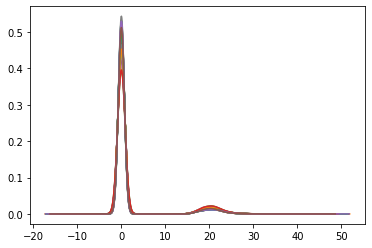

In [8]:
all_samples_log.plot.density(legend = False)

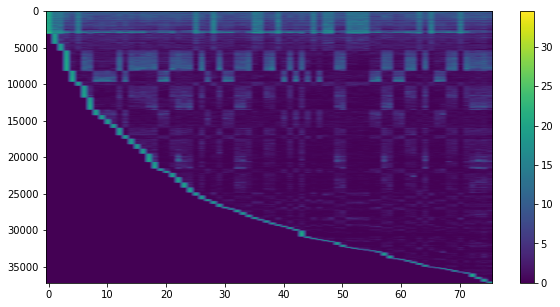

In [10]:
plt.figure(figsize=(10,5))
plt.imshow(all_samples_log,aspect='auto')
plt.colorbar()
plt.show()

## 4. PCA plot

In [13]:
# rearranging the dataframe
Zik = all_samples_log.transpose()[np.array(sample_description['Dataset'] == 'Zika')].transpose()
zik_con = Zik.transpose()[np.array(sample_description[sample_description["Dataset"] == "Zika"]['Condition'] =="control")].transpose()
zik_inf = Zik.transpose()[np.array(sample_description[sample_description["Dataset"] == "Zika"]['Condition'] =="infected")].transpose()
Mal = all_samples_log.transpose()[np.array(sample_description['Dataset'] == 'Malaria')].transpose()
mal_con = Mal.transpose()[np.array(sample_description[sample_description["Dataset"] == "Malaria"]['Condition'] =="control")].transpose()
mal_inf = Mal.transpose()[np.array(sample_description[sample_description["Dataset"] == "Malaria"]['Condition'] =="infected")].transpose()
vl = all_samples_log.transpose()[np.array(sample_description['Dataset'] == 'VL')].transpose()
vl_con = vl.transpose()[np.array(sample_description[sample_description["Dataset"] == "VL"]['Condition'] =="control")].transpose()
vl_inf = vl.transpose()[np.array(sample_description[sample_description["Dataset"] == "VL"]['Condition'] =="infected")].transpose()

In [17]:
# rearranging the dataframe
file = "/Users/anamaria/Desktop/batchremoved.csv"
batch_removed = pd.read_csv(file)
Zik = batch_removed.transpose()[np.array(sample_description['Dataset'] == 'Zika')].transpose()
zik_con = Zik.transpose()[np.array(sample_description[sample_description["Dataset"] == "Zika"]['Condition'] =="control")].transpose()
zik_inf = Zik.transpose()[np.array(sample_description[sample_description["Dataset"] == "Zika"]['Condition'] =="infected")].transpose()
Mal = batch_removed.transpose()[np.array(sample_description['Dataset'] == 'Malaria')].transpose()
mal_con = Mal.transpose()[np.array(sample_description[sample_description["Dataset"] == "Malaria"]['Condition'] =="control")].transpose()
mal_inf = Mal.transpose()[np.array(sample_description[sample_description["Dataset"] == "Malaria"]['Condition'] =="infected")].transpose()
vl = batch_removed.transpose()[np.array(sample_description['Dataset'] == 'VL')].transpose()
vl_con = vl.transpose()[np.array(sample_description[sample_description["Dataset"] == "VL"]['Condition'] =="control")].transpose()
vl_inf = vl.transpose()[np.array(sample_description[sample_description["Dataset"] == "VL"]['Condition'] =="infected")].transpose()

In [14]:
pdList = [vl_con,zik_con,mal_con, vl_inf,zik_inf, mal_inf]  
all_samples_log_rearanged = pd.concat(pdList, axis = 1)

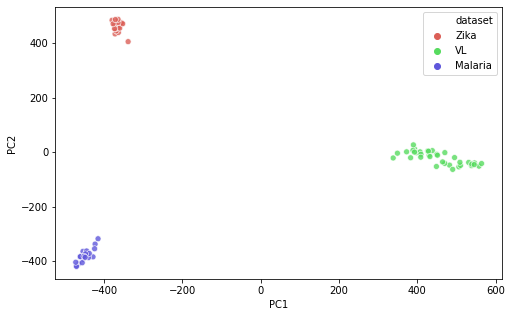

In [15]:
from sklearn.decomposition import PCA
pca_samples = PCA(n_components=3)

principalComponents = pca_samples.fit_transform(all_samples_log.transpose())
principalComponents_df = pd.DataFrame(data = principalComponents, columns= ['PC1','PC2', 'PC3'])
principalComponents_df['condition'] = list(sample_description['Condition'])
principalComponents_df['dataset'] = list(sample_description['Dataset'])

plt.figure(figsize=(8,5))
sns.scatterplot(x="PC1", y="PC2",hue="dataset",
    palette=sns.color_palette("hls", 3),
    data=principalComponents_df,
    legend="full",
    alpha=0.8
)

In [16]:
all_samples_log_rearanged

,VL7.mzXML,VL17.mzXML,VL16.mzXML,VL10.mzXML,VL1.mzXML,VL11.mzXML,VL15.mzXML,VL14.mzXML,VL4.mzXML,VL5.mzXML,...,KM_20.mzXML,KM_21.mzXML,KM_6.mzXML,KM_10.mzXML,KM_4.mzXML,KM_16.mzXML,KM_1.mzXML,KM_13.mzXML,KM_19.mzXML,KM_7.mzXML
row ID,,,,,,,,,,,,,,,,,,,,,
1,24.761446,26.320643,25.836367,26.540400,25.409187,24.694344,24.596777,24.776523,25.629722,25.290078,...,24.165915,24.374143,24.185432,24.034782,24.620879,23.936180,25.288263,23.776002,23.860667,24.066574
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.388505,19.268375,18.626562,0.000000,19.705539,0.000000,18.584427,0.000000,20.284087,18.071586
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.982993,0.000000,18.541040,18.607040,18.698598,18.812203,18.208948,0.000000,19.442180,18.442055
4,0.000000,21.449042,20.698654,21.614644,20.658568,19.877962,0.000000,19.965747,20.919203,20.175236,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.539417,0.000000,0.000000,0.000000
5,20.235711,19.512561,0.000000,0.000000,20.428375,0.000000,0.000000,19.521716,19.623708,0.000000,...,0.000000,0.000000,0.000000,19.746629,0.000000,20.315940,0.000000,18.894958,0.000000,19.260501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
comp_list = [ 1439,366,  2629, 1189, 798, 1463, 1591, 298, 714]
data = all_samples_log_rearanged.loc[comp_list]

In [48]:
samples_dict = {}
for i in all_samples_log_rearanged.transpose():
    print(all_samples_log_rearanged.loc[i])
    samples_dict[i] = 

C7_2.mzXML     25.352702
C10_2.mzXML    25.523555
C18_2.mzXML    25.436102
C2_2.mzXML     25.366297
C5_2.mzXML     24.943663
                 ...    
KM_14.mzXML    23.875831
KM_15.mzXML    24.086456
KM_20.mzXML    24.165915
KM_21.mzXML    24.374143
KM_6.mzXML     24.185432
Name: 1, Length: 76, dtype: float64
C7_2.mzXML     27.380196
C10_2.mzXML    28.219406
C18_2.mzXML    28.418392
C2_2.mzXML     27.987970
C5_2.mzXML     26.817638
                 ...    
KM_14.mzXML    26.354517
KM_15.mzXML    25.329447
KM_20.mzXML    23.809119
KM_21.mzXML    23.999180
KM_6.mzXML     24.422379
Name: 2051, Length: 76, dtype: float64
C7_2.mzXML     25.945671
C10_2.mzXML    25.522425
C18_2.mzXML    25.865820
C2_2.mzXML     25.542571
C5_2.mzXML     25.012539
                 ...    
KM_14.mzXML    24.227796
KM_15.mzXML    24.166425
KM_20.mzXML    24.066201
KM_21.mzXML    24.445735
KM_6.mzXML     24.150456
Name: 6, Length: 76, dtype: float64
C7_2.mzXML     24.081338
C10_2.mzXML    22.506982
C18_2.mzXML   

Name: 338, Length: 76, dtype: float64
C7_2.mzXML     28.981104
C10_2.mzXML    28.101882
C18_2.mzXML    28.153906
C2_2.mzXML     28.666643
C5_2.mzXML     29.904373
                 ...    
KM_14.mzXML    28.192927
KM_15.mzXML    28.201066
KM_20.mzXML    27.746433
KM_21.mzXML    28.428963
KM_6.mzXML     27.800188
Name: 344, Length: 76, dtype: float64
C7_2.mzXML     24.208989
C10_2.mzXML    21.542109
C18_2.mzXML    23.620409
C2_2.mzXML     22.915742
C5_2.mzXML     23.438487
                 ...    
KM_14.mzXML    22.285692
KM_15.mzXML    23.182612
KM_20.mzXML    20.371662
KM_21.mzXML    21.019708
KM_6.mzXML     21.692184
Name: 2392, Length: 76, dtype: float64
C7_2.mzXML      0.000000
C10_2.mzXML    20.486867
C18_2.mzXML    20.504660
C2_2.mzXML     20.473602
C5_2.mzXML      0.000000
                 ...    
KM_14.mzXML    20.600058
KM_15.mzXML    20.912017
KM_20.mzXML    21.107020
KM_21.mzXML    20.950840
KM_6.mzXML     21.464292
Name: 352, Length: 76, dtype: float64
C7_2.mzXML     20.0913

Name: 2664, Length: 76, dtype: float64
C7_2.mzXML     22.239757
C10_2.mzXML    23.270438
C18_2.mzXML    23.886584
C2_2.mzXML     22.340908
C5_2.mzXML     22.100529
                 ...    
KM_14.mzXML     0.000000
KM_15.mzXML    21.202341
KM_20.mzXML    21.380798
KM_21.mzXML    21.785525
KM_6.mzXML      0.000000
Name: 2666, Length: 76, dtype: float64
C7_2.mzXML     24.273852
C10_2.mzXML    23.182839
C18_2.mzXML    24.274924
C2_2.mzXML     23.696840
C5_2.mzXML     24.114267
                 ...    
KM_14.mzXML    21.832347
KM_15.mzXML    23.306263
KM_20.mzXML     0.000000
KM_21.mzXML     0.000000
KM_6.mzXML     22.977346
Name: 2667, Length: 76, dtype: float64
C7_2.mzXML     23.266063
C10_2.mzXML    21.818503
C18_2.mzXML    21.406982
C2_2.mzXML     21.389100
C5_2.mzXML     22.007192
                 ...    
KM_14.mzXML    22.075045
KM_15.mzXML    22.024338
KM_20.mzXML    20.971079
KM_21.mzXML    21.633561
KM_6.mzXML     21.421555
Name: 626, Length: 76, dtype: float64
C7_2.mzXML     24.52

Name: 2835, Length: 76, dtype: float64
C7_2.mzXML     24.611477
C10_2.mzXML    24.168667
C18_2.mzXML    23.447920
C2_2.mzXML     24.218228
C5_2.mzXML     24.067733
                 ...    
KM_14.mzXML    22.856527
KM_15.mzXML    23.377025
KM_20.mzXML    22.842498
KM_21.mzXML    23.582058
KM_6.mzXML     22.886778
Name: 2836, Length: 76, dtype: float64
C7_2.mzXML     28.399599
C10_2.mzXML    28.200812
C18_2.mzXML    28.468403
C2_2.mzXML     28.537635
C5_2.mzXML     27.237305
                 ...    
KM_14.mzXML    24.379676
KM_15.mzXML    22.120884
KM_20.mzXML    20.756798
KM_21.mzXML    25.608543
KM_6.mzXML     23.547048
Name: 789, Length: 76, dtype: float64
C7_2.mzXML     22.128706
C10_2.mzXML    23.358836
C18_2.mzXML    22.539088
C2_2.mzXML     22.994208
C5_2.mzXML     22.854389
                 ...    
KM_14.mzXML    23.259992
KM_15.mzXML    23.894080
KM_20.mzXML    23.993557
KM_21.mzXML    24.261699
KM_6.mzXML     22.837398
Name: 2837, Length: 76, dtype: float64
C7_2.mzXML     25.04

Name: 3026, Length: 76, dtype: float64
C7_2.mzXML     24.671022
C10_2.mzXML    23.655397
C18_2.mzXML    24.654757
C2_2.mzXML     24.336466
C5_2.mzXML     23.275321
                 ...    
KM_14.mzXML    23.974415
KM_15.mzXML    24.293741
KM_20.mzXML    23.610892
KM_21.mzXML    24.322927
KM_6.mzXML     22.742861
Name: 3027, Length: 76, dtype: float64
C7_2.mzXML     23.098469
C10_2.mzXML    22.113607
C18_2.mzXML    22.736246
C2_2.mzXML     23.226959
C5_2.mzXML     21.665128
                 ...    
KM_14.mzXML    22.722157
KM_15.mzXML    23.254527
KM_20.mzXML    22.025539
KM_21.mzXML     0.000000
KM_6.mzXML     22.231019
Name: 3028, Length: 76, dtype: float64
C7_2.mzXML     21.408243
C10_2.mzXML     0.000000
C18_2.mzXML     0.000000
C2_2.mzXML     20.282415
C5_2.mzXML      0.000000
                 ...    
KM_14.mzXML    19.902693
KM_15.mzXML    21.530936
KM_20.mzXML    19.852590
KM_21.mzXML    19.966268
KM_6.mzXML     20.808392
Name: 989, Length: 76, dtype: float64
C7_2.mzXML     25.97

Name: 1394, Length: 76, dtype: float64
C7_2.mzXML      0.000000
C10_2.mzXML     0.000000
C18_2.mzXML     0.000000
C2_2.mzXML      0.000000
C5_2.mzXML      0.000000
                 ...    
KM_14.mzXML    24.704257
KM_15.mzXML    24.793280
KM_20.mzXML    24.385135
KM_21.mzXML     0.000000
KM_6.mzXML      0.000000
Name: 1401, Length: 76, dtype: float64
C7_2.mzXML     21.207093
C10_2.mzXML     0.000000
C18_2.mzXML    21.320058
C2_2.mzXML     20.705717
C5_2.mzXML      0.000000
                 ...    
KM_14.mzXML     0.000000
KM_15.mzXML     0.000000
KM_20.mzXML     0.000000
KM_21.mzXML    19.985806
KM_6.mzXML      0.000000
Name: 3452, Length: 76, dtype: float64
C7_2.mzXML     22.717761
C10_2.mzXML    21.880371
C18_2.mzXML    22.383837
C2_2.mzXML     22.213785
C5_2.mzXML     21.812819
                 ...    
KM_14.mzXML    21.989067
KM_15.mzXML    21.414175
KM_20.mzXML    20.561988
KM_21.mzXML    21.758970
KM_6.mzXML     21.660133
Name: 1405, Length: 76, dtype: float64
C7_2.mzXML     30.2

C7_2.mzXML     21.831376
C10_2.mzXML    21.183575
C18_2.mzXML    22.015902
C2_2.mzXML     21.603802
C5_2.mzXML      0.000000
                 ...    
KM_14.mzXML    20.650317
KM_15.mzXML    20.314374
KM_20.mzXML     0.000000
KM_21.mzXML     0.000000
KM_6.mzXML     20.535993
Name: 1982, Length: 76, dtype: float64
C7_2.mzXML     27.951274
C10_2.mzXML    28.091666
C18_2.mzXML    28.312536
C2_2.mzXML     27.671946
C5_2.mzXML     27.089457
                 ...    
KM_14.mzXML    22.048467
KM_15.mzXML    21.223145
KM_20.mzXML    21.472355
KM_21.mzXML    22.461147
KM_6.mzXML     21.004204
Name: 1993, Length: 76, dtype: float64
C7_2.mzXML     22.003446
C10_2.mzXML    19.027488
C18_2.mzXML    20.441521
C2_2.mzXML     21.560636
C5_2.mzXML     19.999235
                 ...    
KM_14.mzXML    21.925522
KM_15.mzXML    20.719008
KM_20.mzXML     0.000000
KM_21.mzXML    20.073569
KM_6.mzXML     20.232945
Name: 2006, Length: 76, dtype: float64
C7_2.mzXML     22.442722
C10_2.mzXML    21.803371
C18_2.mz

In [54]:
sample_description.index = sample_description['Sample Name'] 

In [55]:
sample_description

,Sample Name,Condition,Dataset,ConditionDataset
Sample Name,,,,
ZIK6.mzXML,ZIK6.mzXML,infected,Zika,infectedZika
ZIK7.mzXML,ZIK7.mzXML,infected,Zika,infectedZika
ZIK10.mzXML,ZIK10.mzXML,infected,Zika,infectedZika
C7_2.mzXML,C7_2.mzXML,control,VL,controlVL
KM_10.mzXML,KM_10.mzXML,control,Malaria,controlMalaria
...,...,...,...,...
C9_2.mzXML,C9_2.mzXML,control,VL,controlVL
VL13.mzXML,VL13.mzXML,infected,VL,infectedVL
VL12.mzXML,VL12.mzXML,infected,VL,infectedVL


In [56]:
new_cols = []
for col in all_samples_log_rearanged.columns:
    new_cols.append(sample_description.loc[col]['Condition'])

In [58]:
all_samples_log_rearanged.columns = new_cols

In [77]:
alll = []
for i in all_samples_log_rearanged.index:
    con = np.sort(np.array(all_samples_log_rearanged.loc[i]['control']))
    inf = np.sort(np.array(all_samples_log_rearanged.loc[i]['infected']))
    alls = np.concatenate([con, inf], axis=None )
    alll.append(alls)

In [86]:
def Sort(sub_li): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    sub_li.sort(key = lambda x: np.max(x)) 
    return sub_li 
  
# Driver Code 

alll_sort = Sort(alll)

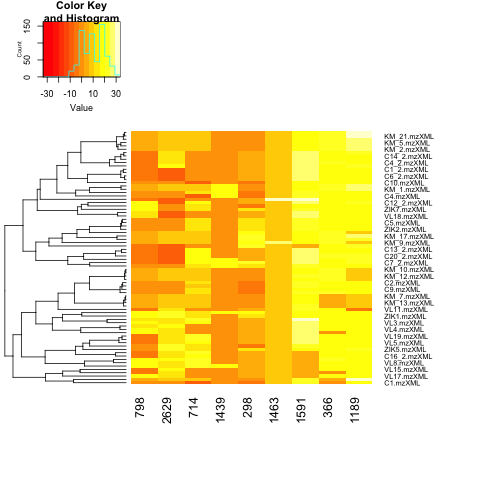

In [85]:
%%R -i data
#install.packages("gplots")
#library("gplots")
mydata <- data
clustfunc <- function(x) hclust(x, method="complete")
distfunc <- function(x) dist(x,method="euclidean")

heatmap.2(as.matrix(mydata),dendrogram="row",trace="none", margin=c(8,9), hclust=clustfunc,distfun=distfunc)

In [19]:
%%R
training.subset.mapcol =  function (Condition) { if (Condition =="infected") "#FF0000" else "#0000FF" }
samples.col = unlist (lapply(pData(eset)$Condition, training.subset.mapcol))

#training.subset.heatmap = heatmap.2(data, col=topo.colors(100), scale="none", ColSideColors=samples.col, key=TRUE, symkey=FALSE, density.info="none", trace="none", cexRow=0.5)

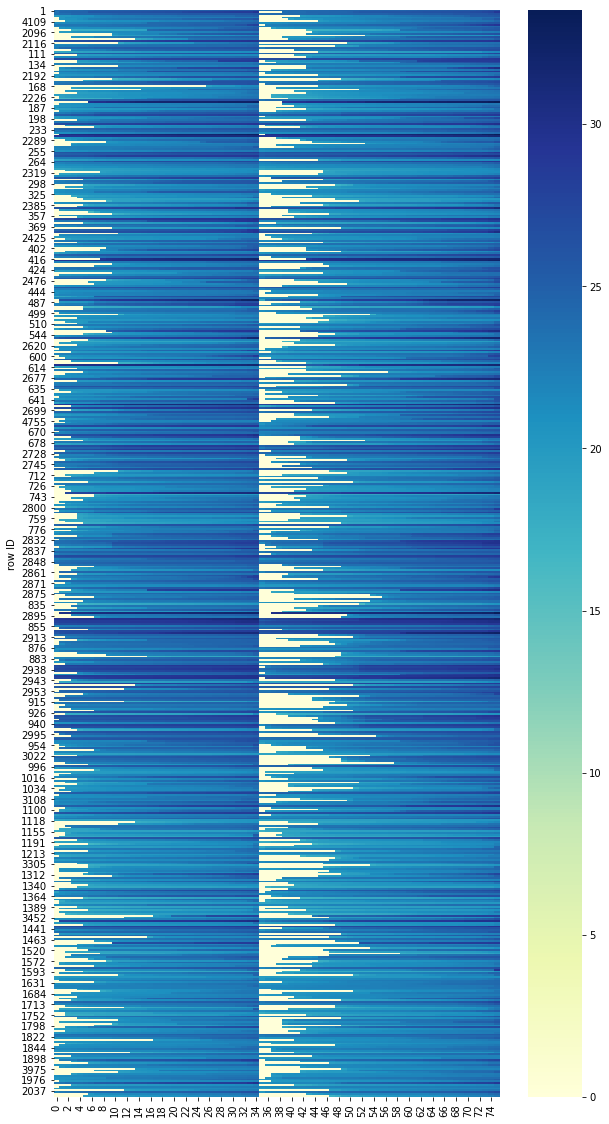

In [109]:
plt.figure(figsize=(10,20))
sns.heatmap(ald,  cmap="YlGnBu")

## 5. Filtering

In [16]:
from metab_utils import get_ids_for_top_percent
idzik = get_ids_for_top_percent(Zik, 50)
idmal = get_ids_for_top_percent(Mal, 50)
idvl = get_ids_for_top_percent(vl, 50)
inters = set(idzik) & set(idmal) & set(idvl)
print('Total number of peaksets remaining after filtering: {}'.format(len(inters)))

Total number of peaksets remaining after filtering: 604


In [13]:
all_samples_log_filtered = all_samples_log.loc[list(inters)]

In [19]:
all_samples_filtered = all_samples.loc[list(inters)]
all_samples_filtered.to_csv('/Users/anamaria/Desktop/samples_filtered.csv')

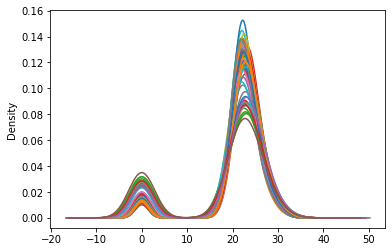

In [21]:
all_samples_log_filtered.plot.density(legend=False)

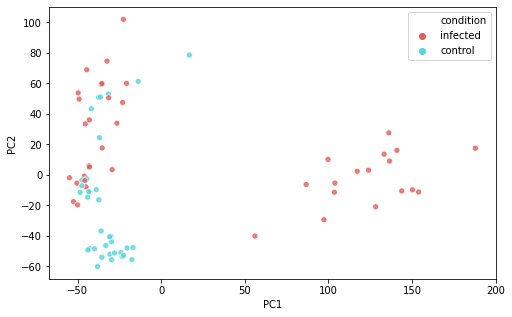

In [16]:
pca_samples = PCA(n_components=3)

principalComponents = pca_samples.fit_transform(all_samples_log_filtered.transpose())
principalComponents_df = pd.DataFrame(data = principalComponents, columns= ['PC1','PC2', 'PC3'])
principalComponents_df['condition'] = list(sample_description['Condition'])
principalComponents_df['dataset'] = list(sample_description['Dataset'])

plt.figure(figsize=(8,5))
sns.scatterplot(x="PC1", y="PC2",hue="condition",
    palette=sns.color_palette("hls", 2),
    data=principalComponents_df,
    legend="full",
    alpha=0.8
)

## 6. Imputing missing values with KNN

In [60]:
all_samples_log_filtered_na = all_samples_log.copy()
all_samples_log_filtered_na.replace(0, np.nan, inplace = True)

In [62]:
from metab_utils import impute_knn
sample_values = all_samples_log_filtered_na
zik_con_filled = impute_knn(sample_values, list(zik_con.columns))
zik_inf_filled = impute_knn(sample_values, list(zik_inf.columns))
vl_con_filled = impute_knn(sample_values, list(vl_con.columns))
vl_inf_filled = impute_knn(sample_values, list(vl_inf.columns))
mal_con_filled = impute_knn(sample_values, list(mal_con.columns))
mal_inf_filled = impute_knn(sample_values, list(mal_inf.columns))

Imputing row 1/37220 with 0 missing, elapsed time: 178.005
Imputing row 101/37220 with 0 missing, elapsed time: 178.299
Imputing row 201/37220 with 9 missing, elapsed time: 178.439
Imputing row 301/37220 with 0 missing, elapsed time: 178.592
Imputing row 401/37220 with 0 missing, elapsed time: 178.742
Imputing row 501/37220 with 4 missing, elapsed time: 178.827
Imputing row 601/37220 with 0 missing, elapsed time: 178.938
Imputing row 701/37220 with 0 missing, elapsed time: 179.091
Imputing row 801/37220 with 5 missing, elapsed time: 179.184
Imputing row 901/37220 with 9 missing, elapsed time: 179.260
Imputing row 1001/37220 with 9 missing, elapsed time: 179.404
Imputing row 1101/37220 with 0 missing, elapsed time: 179.542
Imputing row 1201/37220 with 8 missing, elapsed time: 179.637
Imputing row 1301/37220 with 9 missing, elapsed time: 179.824
Imputing row 1401/37220 with 0 missing, elapsed time: 179.933
Imputing row 1501/37220 with 1 missing, elapsed time: 180.012
Imputing row 1601/37

Imputing row 13301/37220 with 9 missing, elapsed time: 187.362
Imputing row 13401/37220 with 9 missing, elapsed time: 187.436
Imputing row 13501/37220 with 6 missing, elapsed time: 187.504
Imputing row 13601/37220 with 9 missing, elapsed time: 187.566
Imputing row 13701/37220 with 9 missing, elapsed time: 187.654
Imputing row 13801/37220 with 8 missing, elapsed time: 187.773
Imputing row 13901/37220 with 9 missing, elapsed time: 187.864
Imputing row 14001/37220 with 9 missing, elapsed time: 187.924
Imputing row 14101/37220 with 9 missing, elapsed time: 187.977
Imputing row 14201/37220 with 9 missing, elapsed time: 188.039
Imputing row 14301/37220 with 9 missing, elapsed time: 188.087
Imputing row 14401/37220 with 9 missing, elapsed time: 188.125
Imputing row 14501/37220 with 9 missing, elapsed time: 188.227
Imputing row 14601/37220 with 9 missing, elapsed time: 188.365
Imputing row 14701/37220 with 9 missing, elapsed time: 188.479
Imputing row 14801/37220 with 9 missing, elapsed time: 

Imputing row 26701/37220 with 9 missing, elapsed time: 194.655
Imputing row 26801/37220 with 9 missing, elapsed time: 194.672
Imputing row 26901/37220 with 9 missing, elapsed time: 194.711
Imputing row 27001/37220 with 9 missing, elapsed time: 194.750
Imputing row 27101/37220 with 9 missing, elapsed time: 194.838
Imputing row 27201/37220 with 9 missing, elapsed time: 194.869
Imputing row 27301/37220 with 8 missing, elapsed time: 194.971
Imputing row 27401/37220 with 9 missing, elapsed time: 195.006
Imputing row 27501/37220 with 9 missing, elapsed time: 195.035
Imputing row 27601/37220 with 9 missing, elapsed time: 195.051
Imputing row 27701/37220 with 9 missing, elapsed time: 195.081
Imputing row 27801/37220 with 9 missing, elapsed time: 195.110
Imputing row 27901/37220 with 9 missing, elapsed time: 195.137
Imputing row 28001/37220 with 9 missing, elapsed time: 195.154
Imputing row 28101/37220 with 9 missing, elapsed time: 195.164
Imputing row 28201/37220 with 8 missing, elapsed time: 

Imputing row 2401/37220 with 0 missing, elapsed time: 174.162
Imputing row 2501/37220 with 9 missing, elapsed time: 174.262
Imputing row 2601/37220 with 2 missing, elapsed time: 174.389
Imputing row 2701/37220 with 0 missing, elapsed time: 174.466
Imputing row 2801/37220 with 9 missing, elapsed time: 174.542
Imputing row 2901/37220 with 0 missing, elapsed time: 174.634
Imputing row 3001/37220 with 7 missing, elapsed time: 174.687
Imputing row 3101/37220 with 7 missing, elapsed time: 174.813
Imputing row 3201/37220 with 6 missing, elapsed time: 174.903
Imputing row 3301/37220 with 9 missing, elapsed time: 175.053
Imputing row 3401/37220 with 9 missing, elapsed time: 175.146
Imputing row 3501/37220 with 6 missing, elapsed time: 175.237
Imputing row 3601/37220 with 8 missing, elapsed time: 175.357
Imputing row 3701/37220 with 6 missing, elapsed time: 175.454
Imputing row 3801/37220 with 7 missing, elapsed time: 175.534
Imputing row 3901/37220 with 6 missing, elapsed time: 175.629
Imputing

Imputing row 15501/37220 with 8 missing, elapsed time: 181.297
Imputing row 15601/37220 with 10 missing, elapsed time: 181.349
Imputing row 15701/37220 with 9 missing, elapsed time: 181.381
Imputing row 15801/37220 with 9 missing, elapsed time: 181.422
Imputing row 15901/37220 with 10 missing, elapsed time: 181.458
Imputing row 16001/37220 with 10 missing, elapsed time: 181.482
Imputing row 16101/37220 with 9 missing, elapsed time: 181.516
Imputing row 16201/37220 with 10 missing, elapsed time: 181.546
Imputing row 16301/37220 with 10 missing, elapsed time: 181.577
Imputing row 16401/37220 with 10 missing, elapsed time: 181.608
Imputing row 16501/37220 with 10 missing, elapsed time: 181.637
Imputing row 16601/37220 with 10 missing, elapsed time: 181.667
Imputing row 16701/37220 with 10 missing, elapsed time: 181.684
Imputing row 16801/37220 with 10 missing, elapsed time: 181.705
Imputing row 16901/37220 with 10 missing, elapsed time: 181.724
Imputing row 17001/37220 with 10 missing, el

Imputing row 29101/37220 with 10 missing, elapsed time: 186.473
Imputing row 29201/37220 with 10 missing, elapsed time: 186.492
Imputing row 29301/37220 with 10 missing, elapsed time: 186.521
Imputing row 29401/37220 with 10 missing, elapsed time: 186.548
Imputing row 29501/37220 with 10 missing, elapsed time: 186.561
Imputing row 29601/37220 with 10 missing, elapsed time: 186.576
Imputing row 29701/37220 with 10 missing, elapsed time: 186.589
Imputing row 29801/37220 with 10 missing, elapsed time: 186.607
Imputing row 29901/37220 with 10 missing, elapsed time: 186.622
Imputing row 30001/37220 with 9 missing, elapsed time: 186.638
Imputing row 30101/37220 with 10 missing, elapsed time: 186.650
Imputing row 30201/37220 with 10 missing, elapsed time: 186.664
Imputing row 30301/37220 with 9 missing, elapsed time: 186.677
Imputing row 30401/37220 with 10 missing, elapsed time: 186.694
Imputing row 30501/37220 with 10 missing, elapsed time: 186.708
Imputing row 30601/37220 with 10 missing, 

Imputing row 4701/37220 with 16 missing, elapsed time: 294.981
Imputing row 4801/37220 with 19 missing, elapsed time: 295.085
Imputing row 4901/37220 with 19 missing, elapsed time: 295.211
Imputing row 5001/37220 with 10 missing, elapsed time: 295.348
Imputing row 5101/37220 with 19 missing, elapsed time: 295.444
Imputing row 5201/37220 with 19 missing, elapsed time: 295.534
Imputing row 5301/37220 with 19 missing, elapsed time: 295.639
Imputing row 5401/37220 with 19 missing, elapsed time: 295.787
Imputing row 5501/37220 with 13 missing, elapsed time: 295.974
Imputing row 5601/37220 with 16 missing, elapsed time: 296.174
Imputing row 5701/37220 with 0 missing, elapsed time: 296.349
Imputing row 5801/37220 with 17 missing, elapsed time: 296.532
Imputing row 5901/37220 with 14 missing, elapsed time: 296.702
Imputing row 6001/37220 with 15 missing, elapsed time: 296.874
Imputing row 6101/37220 with 9 missing, elapsed time: 297.046
Imputing row 6201/37220 with 17 missing, elapsed time: 29

Imputing row 17701/37220 with 16 missing, elapsed time: 317.209
Imputing row 17801/37220 with 18 missing, elapsed time: 317.882
Imputing row 17901/37220 with 15 missing, elapsed time: 318.381
Imputing row 18001/37220 with 17 missing, elapsed time: 318.835
Imputing row 18101/37220 with 15 missing, elapsed time: 319.028
Imputing row 18201/37220 with 18 missing, elapsed time: 319.270
Imputing row 18301/37220 with 9 missing, elapsed time: 319.468
Imputing row 18401/37220 with 18 missing, elapsed time: 319.693
Imputing row 18501/37220 with 18 missing, elapsed time: 319.851
Imputing row 18601/37220 with 13 missing, elapsed time: 320.016
Imputing row 18701/37220 with 17 missing, elapsed time: 320.203
Imputing row 18801/37220 with 18 missing, elapsed time: 320.389
Imputing row 18901/37220 with 16 missing, elapsed time: 320.552
Imputing row 19001/37220 with 18 missing, elapsed time: 320.724
Imputing row 19101/37220 with 18 missing, elapsed time: 320.898
Imputing row 19201/37220 with 18 missing,

Imputing row 30601/37220 with 18 missing, elapsed time: 334.678
Imputing row 30701/37220 with 18 missing, elapsed time: 334.813
Imputing row 30801/37220 with 18 missing, elapsed time: 334.959
Imputing row 30901/37220 with 19 missing, elapsed time: 335.046
Imputing row 31001/37220 with 19 missing, elapsed time: 335.072
Imputing row 31101/37220 with 19 missing, elapsed time: 335.098
Imputing row 31201/37220 with 19 missing, elapsed time: 335.126
Imputing row 31301/37220 with 19 missing, elapsed time: 335.152
Imputing row 31401/37220 with 18 missing, elapsed time: 335.177
Imputing row 31501/37220 with 19 missing, elapsed time: 335.204
Imputing row 31601/37220 with 19 missing, elapsed time: 335.231
Imputing row 31701/37220 with 19 missing, elapsed time: 335.269
Imputing row 31801/37220 with 19 missing, elapsed time: 335.305
Imputing row 31901/37220 with 19 missing, elapsed time: 335.345
Imputing row 32001/37220 with 19 missing, elapsed time: 335.377
Imputing row 32101/37220 with 19 missing

Imputing row 6201/37220 with 16 missing, elapsed time: 308.484
Imputing row 6301/37220 with 15 missing, elapsed time: 308.631
Imputing row 6401/37220 with 15 missing, elapsed time: 308.864
Imputing row 6501/37220 with 16 missing, elapsed time: 309.000
Imputing row 6601/37220 with 3 missing, elapsed time: 309.153
Imputing row 6701/37220 with 8 missing, elapsed time: 309.344
Imputing row 6801/37220 with 17 missing, elapsed time: 309.504
Imputing row 6901/37220 with 17 missing, elapsed time: 309.707
Imputing row 7001/37220 with 5 missing, elapsed time: 309.850
Imputing row 7101/37220 with 14 missing, elapsed time: 310.023
Imputing row 7201/37220 with 3 missing, elapsed time: 310.224
Imputing row 7301/37220 with 3 missing, elapsed time: 310.395
Imputing row 7401/37220 with 17 missing, elapsed time: 310.602
Imputing row 7501/37220 with 1 missing, elapsed time: 310.790
Imputing row 7601/37220 with 12 missing, elapsed time: 310.980
Imputing row 7701/37220 with 6 missing, elapsed time: 311.143

Imputing row 19201/37220 with 16 missing, elapsed time: 327.815
Imputing row 19301/37220 with 16 missing, elapsed time: 327.997
Imputing row 19401/37220 with 14 missing, elapsed time: 328.156
Imputing row 19501/37220 with 17 missing, elapsed time: 328.324
Imputing row 19601/37220 with 14 missing, elapsed time: 328.486
Imputing row 19701/37220 with 14 missing, elapsed time: 328.708
Imputing row 19801/37220 with 14 missing, elapsed time: 328.884
Imputing row 19901/37220 with 14 missing, elapsed time: 329.086
Imputing row 20001/37220 with 15 missing, elapsed time: 329.369
Imputing row 20101/37220 with 14 missing, elapsed time: 329.682
Imputing row 20201/37220 with 15 missing, elapsed time: 330.008
Imputing row 20301/37220 with 15 missing, elapsed time: 330.298
Imputing row 20401/37220 with 15 missing, elapsed time: 330.742
Imputing row 20501/37220 with 15 missing, elapsed time: 331.083
Imputing row 20601/37220 with 2 missing, elapsed time: 331.340
Imputing row 20701/37220 with 16 missing,

Imputing row 32201/37220 with 16 missing, elapsed time: 353.826
Imputing row 32301/37220 with 17 missing, elapsed time: 353.993
Imputing row 32401/37220 with 17 missing, elapsed time: 354.035
Imputing row 32501/37220 with 17 missing, elapsed time: 354.071
Imputing row 32601/37220 with 17 missing, elapsed time: 354.127
Imputing row 32701/37220 with 17 missing, elapsed time: 354.195
Imputing row 32801/37220 with 17 missing, elapsed time: 354.248
Imputing row 32901/37220 with 17 missing, elapsed time: 354.280
Imputing row 33001/37220 with 17 missing, elapsed time: 354.318
Imputing row 33101/37220 with 15 missing, elapsed time: 354.460
Imputing row 33201/37220 with 16 missing, elapsed time: 354.657
Imputing row 33301/37220 with 16 missing, elapsed time: 354.883
Imputing row 33401/37220 with 16 missing, elapsed time: 355.096
Imputing row 33501/37220 with 16 missing, elapsed time: 355.268
Imputing row 33601/37220 with 16 missing, elapsed time: 355.505
Imputing row 33701/37220 with 16 missing

Imputing row 8001/37220 with 7 missing, elapsed time: 157.030
Imputing row 8101/37220 with 2 missing, elapsed time: 157.070
Imputing row 8201/37220 with 6 missing, elapsed time: 157.135
Imputing row 8301/37220 with 5 missing, elapsed time: 157.215
Imputing row 8401/37220 with 3 missing, elapsed time: 157.322
Imputing row 8501/37220 with 3 missing, elapsed time: 157.408
Imputing row 8601/37220 with 4 missing, elapsed time: 157.534
Imputing row 8701/37220 with 6 missing, elapsed time: 157.634
Imputing row 8801/37220 with 6 missing, elapsed time: 157.703
Imputing row 8901/37220 with 6 missing, elapsed time: 157.832
Imputing row 9001/37220 with 1 missing, elapsed time: 157.930
Imputing row 9101/37220 with 0 missing, elapsed time: 158.010
Imputing row 9201/37220 with 3 missing, elapsed time: 158.082
Imputing row 9301/37220 with 6 missing, elapsed time: 158.178
Imputing row 9401/37220 with 1 missing, elapsed time: 158.294
Imputing row 9501/37220 with 1 missing, elapsed time: 158.373
Imputing

Imputing row 21601/37220 with 6 missing, elapsed time: 162.375
Imputing row 21701/37220 with 6 missing, elapsed time: 162.456
Imputing row 21801/37220 with 6 missing, elapsed time: 162.525
Imputing row 21901/37220 with 6 missing, elapsed time: 162.580
Imputing row 22001/37220 with 7 missing, elapsed time: 162.640
Imputing row 22101/37220 with 6 missing, elapsed time: 162.707
Imputing row 22201/37220 with 7 missing, elapsed time: 162.733
Imputing row 22301/37220 with 7 missing, elapsed time: 162.749
Imputing row 22401/37220 with 7 missing, elapsed time: 162.763
Imputing row 22501/37220 with 7 missing, elapsed time: 162.808
Imputing row 22601/37220 with 7 missing, elapsed time: 162.824
Imputing row 22701/37220 with 7 missing, elapsed time: 162.837
Imputing row 22801/37220 with 7 missing, elapsed time: 162.858
Imputing row 22901/37220 with 7 missing, elapsed time: 162.870
Imputing row 23001/37220 with 7 missing, elapsed time: 162.882
Imputing row 23101/37220 with 7 missing, elapsed time: 

Imputing row 36501/37220 with 7 missing, elapsed time: 167.374
Imputing row 36601/37220 with 7 missing, elapsed time: 167.381
Imputing row 36701/37220 with 7 missing, elapsed time: 167.389
Imputing row 36801/37220 with 7 missing, elapsed time: 167.399
Imputing row 36901/37220 with 7 missing, elapsed time: 167.412
Imputing row 37001/37220 with 7 missing, elapsed time: 167.421
Imputing row 37101/37220 with 7 missing, elapsed time: 167.428
Imputing row 37201/37220 with 7 missing, elapsed time: 167.437
[KNN] Warning: 200319/260540 still missing after imputation, replacing with 0
Imputing row 1/37220 with 0 missing, elapsed time: 185.923
Imputing row 101/37220 with 0 missing, elapsed time: 186.064
Imputing row 201/37220 with 11 missing, elapsed time: 186.173
Imputing row 301/37220 with 8 missing, elapsed time: 186.309
Imputing row 401/37220 with 0 missing, elapsed time: 186.462
Imputing row 501/37220 with 13 missing, elapsed time: 186.595
Imputing row 601/37220 with 10 missing, elapsed time

Imputing row 12201/37220 with 14 missing, elapsed time: 197.545
Imputing row 12301/37220 with 14 missing, elapsed time: 197.614
Imputing row 12401/37220 with 14 missing, elapsed time: 197.658
Imputing row 12501/37220 with 14 missing, elapsed time: 197.718
Imputing row 12601/37220 with 14 missing, elapsed time: 197.780
Imputing row 12701/37220 with 12 missing, elapsed time: 197.848
Imputing row 12801/37220 with 14 missing, elapsed time: 197.926
Imputing row 12901/37220 with 14 missing, elapsed time: 198.041
Imputing row 13001/37220 with 14 missing, elapsed time: 198.093
Imputing row 13101/37220 with 14 missing, elapsed time: 198.149
Imputing row 13201/37220 with 14 missing, elapsed time: 198.200
Imputing row 13301/37220 with 14 missing, elapsed time: 198.236
Imputing row 13401/37220 with 14 missing, elapsed time: 198.326
Imputing row 13501/37220 with 6 missing, elapsed time: 198.361
Imputing row 13601/37220 with 12 missing, elapsed time: 198.568
Imputing row 13701/37220 with 8 missing, 

Imputing row 25201/37220 with 14 missing, elapsed time: 206.644
Imputing row 25301/37220 with 14 missing, elapsed time: 206.672
Imputing row 25401/37220 with 14 missing, elapsed time: 206.711
Imputing row 25501/37220 with 14 missing, elapsed time: 206.744
Imputing row 25601/37220 with 14 missing, elapsed time: 206.761
Imputing row 25701/37220 with 14 missing, elapsed time: 206.783
Imputing row 25801/37220 with 13 missing, elapsed time: 206.856
Imputing row 25901/37220 with 12 missing, elapsed time: 206.957
Imputing row 26001/37220 with 11 missing, elapsed time: 207.064
Imputing row 26101/37220 with 14 missing, elapsed time: 207.111
Imputing row 26201/37220 with 14 missing, elapsed time: 207.144
Imputing row 26301/37220 with 14 missing, elapsed time: 207.171
Imputing row 26401/37220 with 14 missing, elapsed time: 207.209
Imputing row 26501/37220 with 14 missing, elapsed time: 207.238
Imputing row 26601/37220 with 14 missing, elapsed time: 207.255
Imputing row 26701/37220 with 14 missing

In [63]:
pdList = [vl_inf_filled,vl_con_filled,zik_inf_filled, zik_con_filled, mal_inf_filled,mal_con_filled]  
all_samples_log_filtered_filled = pd.concat(pdList, axis = 1)
all_samples_log_filtered_filled = all_samples_log_filtered_filled[list(all_samples_log.columns)]

## 7. Export data (Skip this step now)

In [18]:
#filtered values without missing values imputed
all_samples_log_filtered.to_csv(osp+'pymz/mzmine/221119/all_samples_log2_filtered.csv', header=True, index=True, sep=',', mode='w')
#filtered values with missing values imputed
all_samples_log_filtered_filled.to_csv(osp+'pymz/mzmine/221119/all_samples_log2_filtered_filled.csv', header=True, index=True, sep=',', mode='w')
#pheno data
sample_description.to_csv(osp+'pymz/mzmine/221119/sample_description.csv', header=True, index=None, sep=',', mode='w')
feature_description.to_csv(osp+'pymz/mzmine/221119/feature_description.csv', header=True, index=True, sep=',', mode='w')
                           
                           

In [20]:
filtered_samples = all_samples_log_filtered.copy()
filtered_samples = filtered_samples.transpose()
filtered_samples["Condition"] = np.array(sample_description["Condition"])
filtered_samples["Dataset"] = np.array(sample_description["Dataset"])
filtered_samples['ConditionDataset'] = np.array(sample_description['ConditionDataset'])
filtered_samples.to_csv(osp+'pymz/mzmine/221119/modifiedRTfiltereddata.txt', header=True, index=True, sep='\t', mode='w')

## 8. Limma analysis in R

In [12]:
#all_samples_log_filtered_file = output_dir + 'all_samples_log_filtered.csv'
sample_description_file = output_dir + 'sample_description.csv'
#all_samples_log_filled_file = output_dir + 'all_samples_log_filtered_filled.csv'
all_samples_log_file = output_dir + 'all_samples_log.csv'


#all_samples_log_filtered.to_csv(all_samples_log_filtered_file, header=True, index=True, sep=',', mode='w')
sample_description.to_csv(sample_description_file, header=True, index=None, sep=',', mode='w')
#all_samples_log_filtered_filled.to_csv(all_samples_log_filled_file, header=True, index=True, sep=',', mode='w')
all_samples_log.to_csv(all_samples_log_file, header=True, index=True, sep=',', mode='w')

In [13]:
%load_ext rpy2.ipython

In [14]:
%%R

library(limma)
library(Biobase)

R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following object is masked from ‘package:limma’:

    plotMA


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, 

In [15]:
file_to_be_analysed = all_samples_log_file

In [16]:
%%R -i file_to_be_analysed -i sample_description_file


eset = readExpressionSet(file_to_be_analysed, sample_description_file, 
                         exprsArgs=list(sep=",", header=TRUE,quote="",row.names = 1),
                         phenoDataArgs=list(sep=",", header=TRUE,quote=""))

edata = exprs(eset)
pheno = pData(eset)

#creating the levels for the Condition and Dataset in pData
levels(pheno$Condition) = c('control','infected')
levels(pheno$Dataset)  = c('Malaria', 'VL', 'Zika')
pData(eset) = pheno

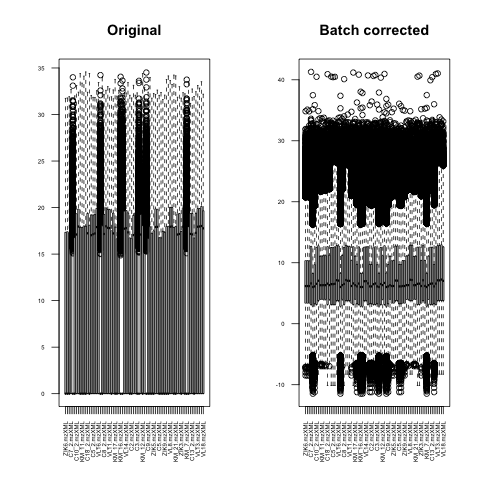

In [68]:
%%R -o edata2

eset.dataset = factor(as.character(pData(eset)$Dataset))
eset.condition = factor(as.character(pData(eset)$Condition))

batch = pheno$Dataset
edata2 = removeBatchEffect(edata, batch, design = model.matrix(~eset.condition))
par(mfrow=c(1,2), cex.axis=0.5, las=2)
boxplot(as.data.frame(edata),main="Original")
boxplot(as.data.frame(edata2),main="Batch corrected")
write.table(edata2, file = "/Users/anamaria/Desktop/batchremoved.csv", sep = ",", quote = FALSE)

In [69]:
batch_removed = pd.DataFrame(data = edata2, columns = all_samples_log.columns)

In [50]:
?pd.DataFrame

In [51]:
limma_table_file = output_dir + 'limma_independent_toptable_filled.csv'

In [52]:
%%R -i limma_table_file

eset.dataset = factor(as.character(pData(eset)$Dataset))
eset.condition = factor(as.character(pData(eset)$Condition))

eset.design = model.matrix(~ 0 + eset.condition + eset.dataset)
eset.fit = lmFit(eset, eset.design)


#define the contrasts you want to make, estimate the coefficients 
#and std errs for these contrasts, eBayes moderation of std errs.
contr = makeContrasts(eset.conditioninfected - eset.conditioncontrol, levels=colnames(coef(eset.fit)))
eset.fit = contrasts.fit(eset.fit, contr)
eset.fit = eBayes(eset.fit)

#Extract results per metabolite
top.table = topTable(eset.fit, sort.by="p", n=Inf)
write.csv(top.table, file = limma_table_file, sep = ",", quote = FALSE)

In [53]:
limma_table = pd.read_csv(limma_table_file, sep=',')
limma_table.index = limma_table[limma_table.columns[0]]
del limma_table[(limma_table.columns[0])]

In [54]:
print("The number of significantly different metabolites is:",len(limma_table[limma_table['adj.P.Val'] < 0.05]))

The number of significantly different metabolites is: 275


In [55]:
data = feature_description.loc[limma_table.index]
data['adj-p'] = limma_table['adj.P.Val']
data['t-val'] = limma_table['t']
data['custom_id'] = list(data.index)

In [56]:
data.to_csv(output_dir+'limma_independent_toptable_filled_features.csv', header=True, index=None, sep='\t', mode='w')
#needs to be with \t instead of , , for mummichog to work

In [21]:
limmatable = pd.read_csv(output_dir+'limma_independent_toptable_features.csv')

In [38]:
comp_list = [1189, 366, 324, 1993, 1229]
data = all_samples_log.loc[np.array(limmatable['custom_id'])[:10]]

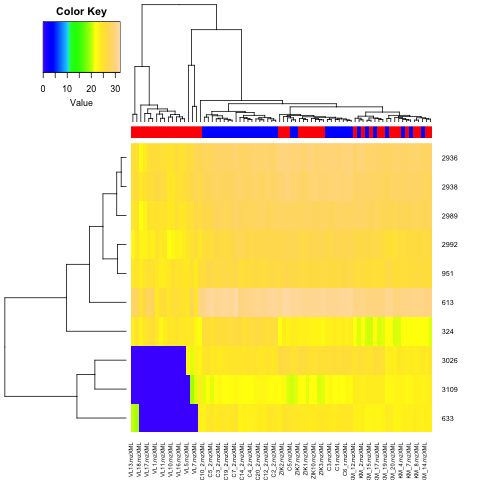

In [39]:
%%R -i data

library('gplots')
training.subset.heatmap = heatmap.2(as.matrix(data), col=topo.colors(300), scale="none", ColSideColors=samples.col, key=TRUE, symkey=FALSE, density.info="none", trace="none", cexRow=0.9)

